In [1]:
# Dependencies
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# Classes
class State():
    def __init__(self, name):
        self.name = name
        self.final = False
        self.output = None
        self.edges = []

    def add_edge(self, destiny, transition):
        edge = Edge(self.name, destiny, transition)
        self.edges.append(edge)

    def add_state_to_trie(self, trie):
        trie.add_node(self.name, final=self.final, output=self.output)

    def add_edges_to_trie(self, trie):
        for edge in self.edges:
            trie.add_edge(edge.origin, edge.destiny,
                         transition=edge.transition)

    def set_final(self, is_final):
        self.final = is_final

    def set_output(self, output):
        self.output = output

    def is_equal(self, state):
        if self.final != state.final:
            return False
        if len(self.edges) != len(state.edges):
            return False
        for edge in self.edges:
            found_equivalent = False
            for state_edge in state.edges:
                if (edge.destiny == state_edge.destiny and edge.transition == state_edge.transition):
                    found_equivalent = True
                    break
            if found_equivalent:
                continue
            return False
        return True


class Edge():
    def __init__(self, origin, destiny, transition):
        self.origin = origin
        self.destiny = destiny
        self.transition = transition


In [3]:
# create trie
def create_trie(dictionary):
    # Initial
        
    trie = nx.DiGraph()
    states = []
    i = 0

    # Creating TRIE based on dictionary
    state0 = State(i)
    i += 1
    state0.add_state_to_trie(trie)

    for key, value in dictionary.items():
        state = 0
        for idx, letter in enumerate(key):
            current_state_edges = dict(trie[state])
            prev_state = state
            for next_state, edge_properties in current_state_edges.items():
                if edge_properties['transition'] == letter:
                    state = next_state
                    break
            if (state == prev_state):
                aux_state = State(i)

                if idx == len(key)-1:
                    aux_state.set_final(1)
                    aux_state.set_output(value)

                aux_state.add_state_to_trie(trie)
                trie.add_edge(state, i, transition = letter)
                print(f"adicionei a transição {state} para {i} com a letra {letter}")
                state = i
                i += 1 
                 
    return trie

In [4]:
def read_input(input, trie):
    state = 0
    output = None
    for idx, letter in enumerate(input):
        current_state_edges = dict(trie[state])
        print(trie[state])
        prev_state = state
        for next_state, edge_properties in current_state_edges.items():
            if edge_properties['transition'] == letter:
                state = next_state
                if idx == len(input)-1:
                    if(trie.nodes[state]["final"]):
                        output = trie.nodes[state]["output"]
                break
        if (state == prev_state):
            break
        
    return output

In [5]:
def create_dictionary():
    dictionary = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
                  "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
    dictionary = dict(sorted(dictionary.items()))
    return dictionary

adicionei a transição 0 para 1 com a letra a
adicionei a transição 1 para 2 com a letra p
adicionei a transição 2 para 3 com a letra r
adicionei a transição 1 para 4 com a letra u
adicionei a transição 4 para 5 com a letra g
adicionei a transição 0 para 6 com a letra d
adicionei a transição 6 para 7 com a letra e
adicionei a transição 7 para 8 com a letra c
adicionei a transição 0 para 9 com a letra f
adicionei a transição 9 para 10 com a letra e
adicionei a transição 10 para 11 com a letra b
adicionei a transição 0 para 12 com a letra j
adicionei a transição 12 para 13 com a letra a
adicionei a transição 13 para 14 com a letra n
adicionei a transição 12 para 15 com a letra u
adicionei a transição 15 para 16 com a letra l
adicionei a transição 15 para 17 com a letra n
adicionei a transição 0 para 18 com a letra m
adicionei a transição 18 para 19 com a letra a
adicionei a transição 19 para 20 com a letra r
adicionei a transição 19 para 21 com a letra y
adicionei a transição 0 para 22 co

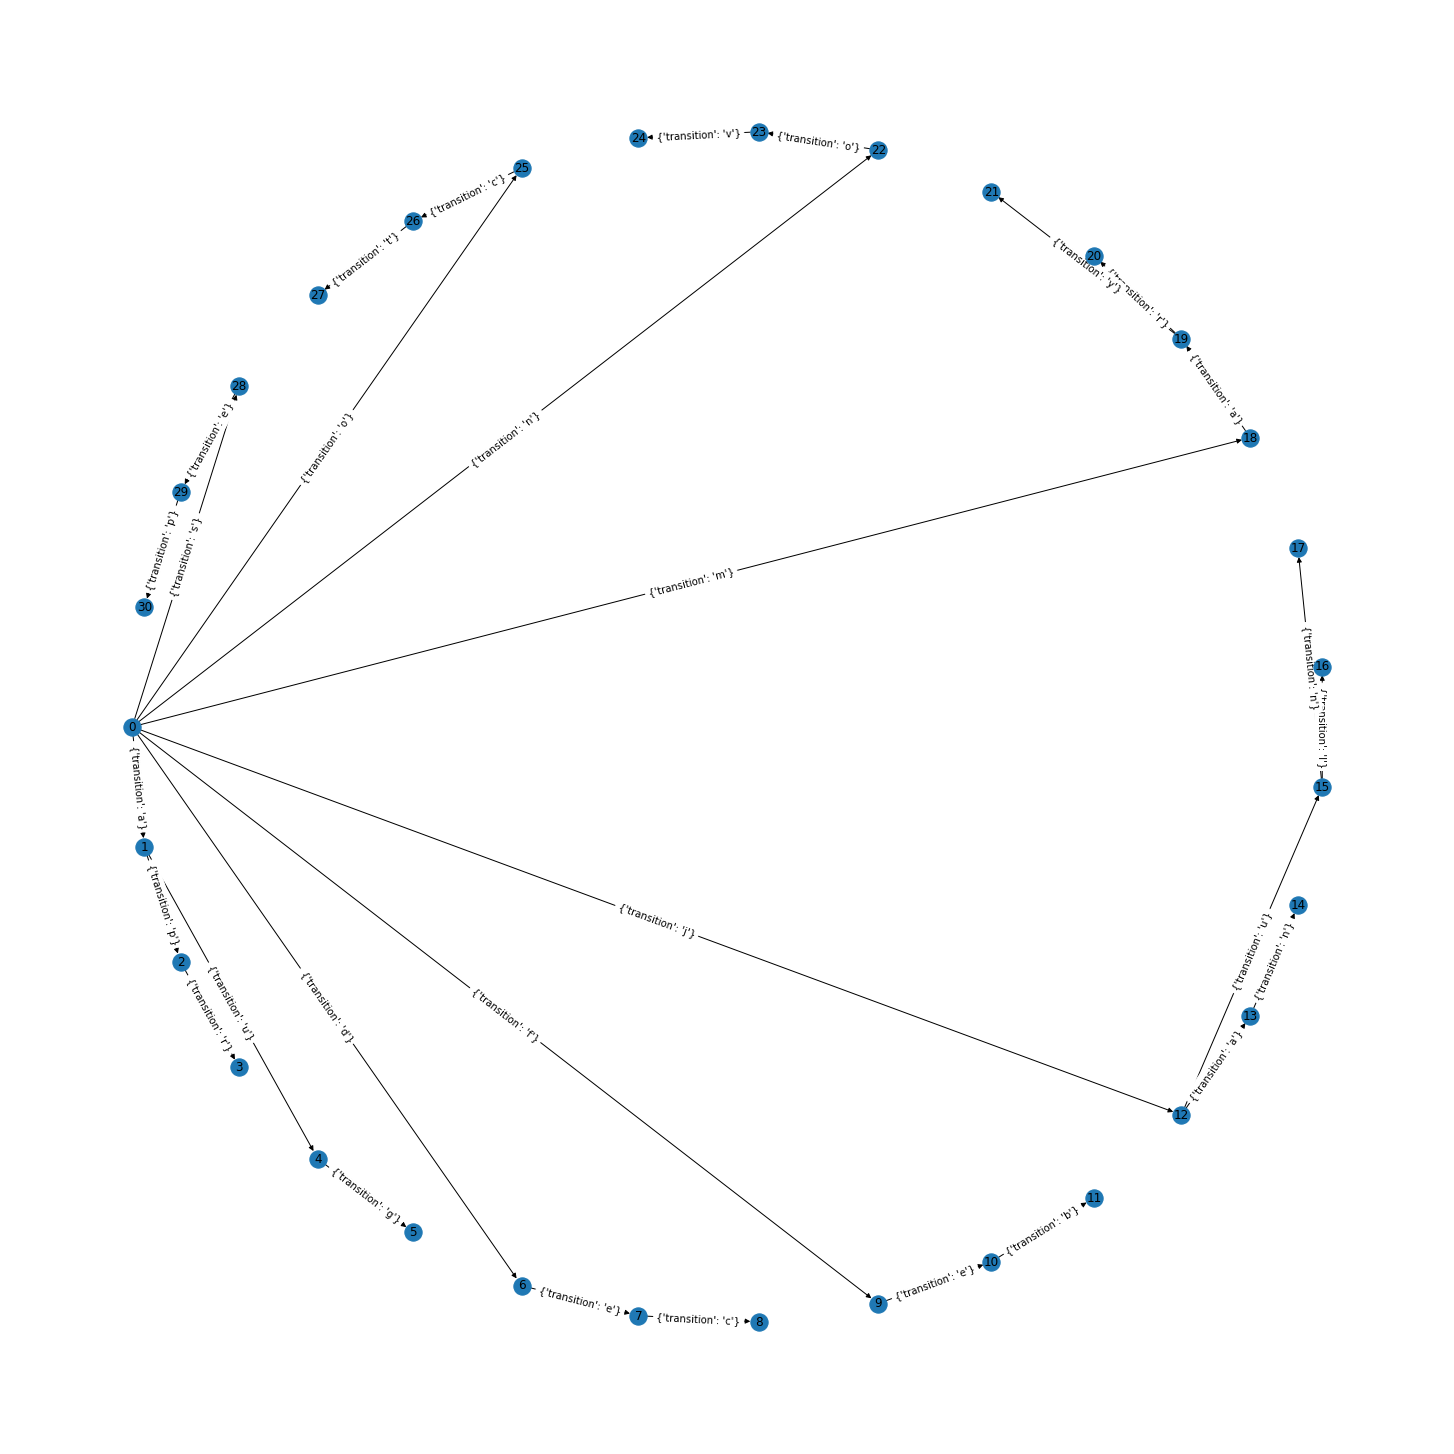

In [6]:
dictionary = create_dictionary()
trie = create_trie(dictionary)
pos = nx.shell_layout(trie)
plt.figure(figsize=(20,20))
nx.draw(trie, pos, with_labels=True)
nx.draw_networkx_edge_labels(trie, pos)

print(read_input("jun", trie)) 